In [1]:
import json
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

#your file path here!
files= os.listdir('Searches')
del files[0]

searches =[]
dates = []
for file in files:
    with open('Searches/%s'%(file)) as json_data:
        d = json.load(json_data)
    for i in range(len(d['event'])):
        for j in range(len((d['event'][i][u'query'][u'id']))):
            searches.append(d['event'][i][u'query'][u'query_text']) 
            dates.append(d['event'][i][u'query'][u'id'][j][u'timestamp_usec'])

dates = [datetime.datetime.fromtimestamp(int(i)/1000000).strftime('%Y-%m-%d %H:%M:%S') 
        for i in dates]
searches = [i.encode('utf-8') for i in searches]

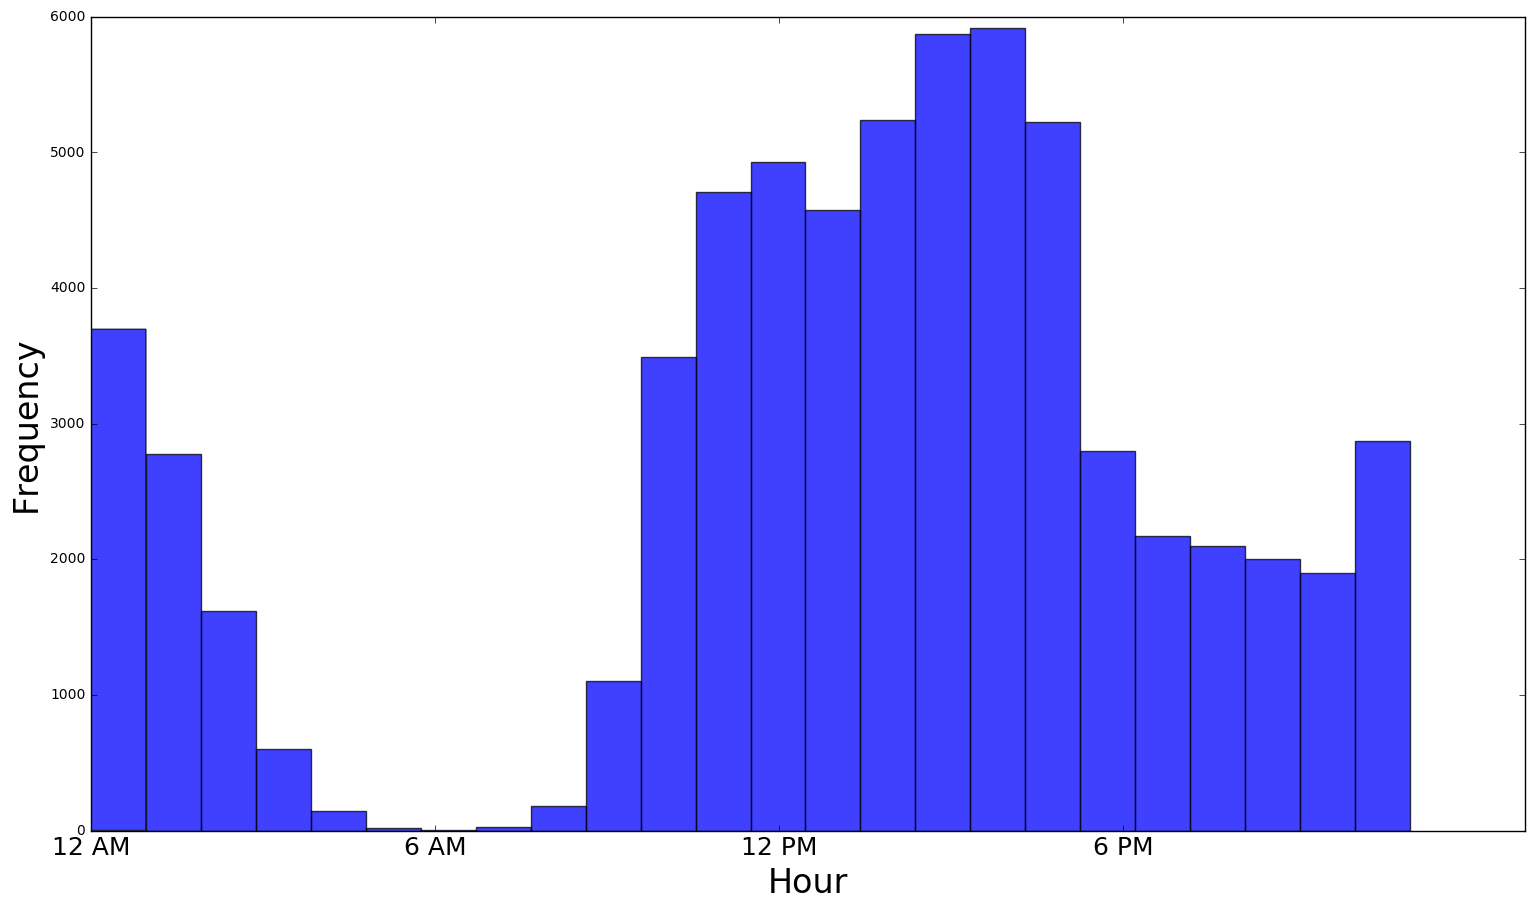

In [2]:
hours = [datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S').hour for i in dates]
n, bins, patches = plt.hist(hours, 24, facecolor='blue', alpha=0.75)
plt.xticks([0,6,12,18], ['12 AM','6 AM', '12 PM', '6 PM'], fontsize=18)
plt.xlabel('Hour', fontsize=24)
plt.ylabel('Frequency', fontsize=24)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.show()

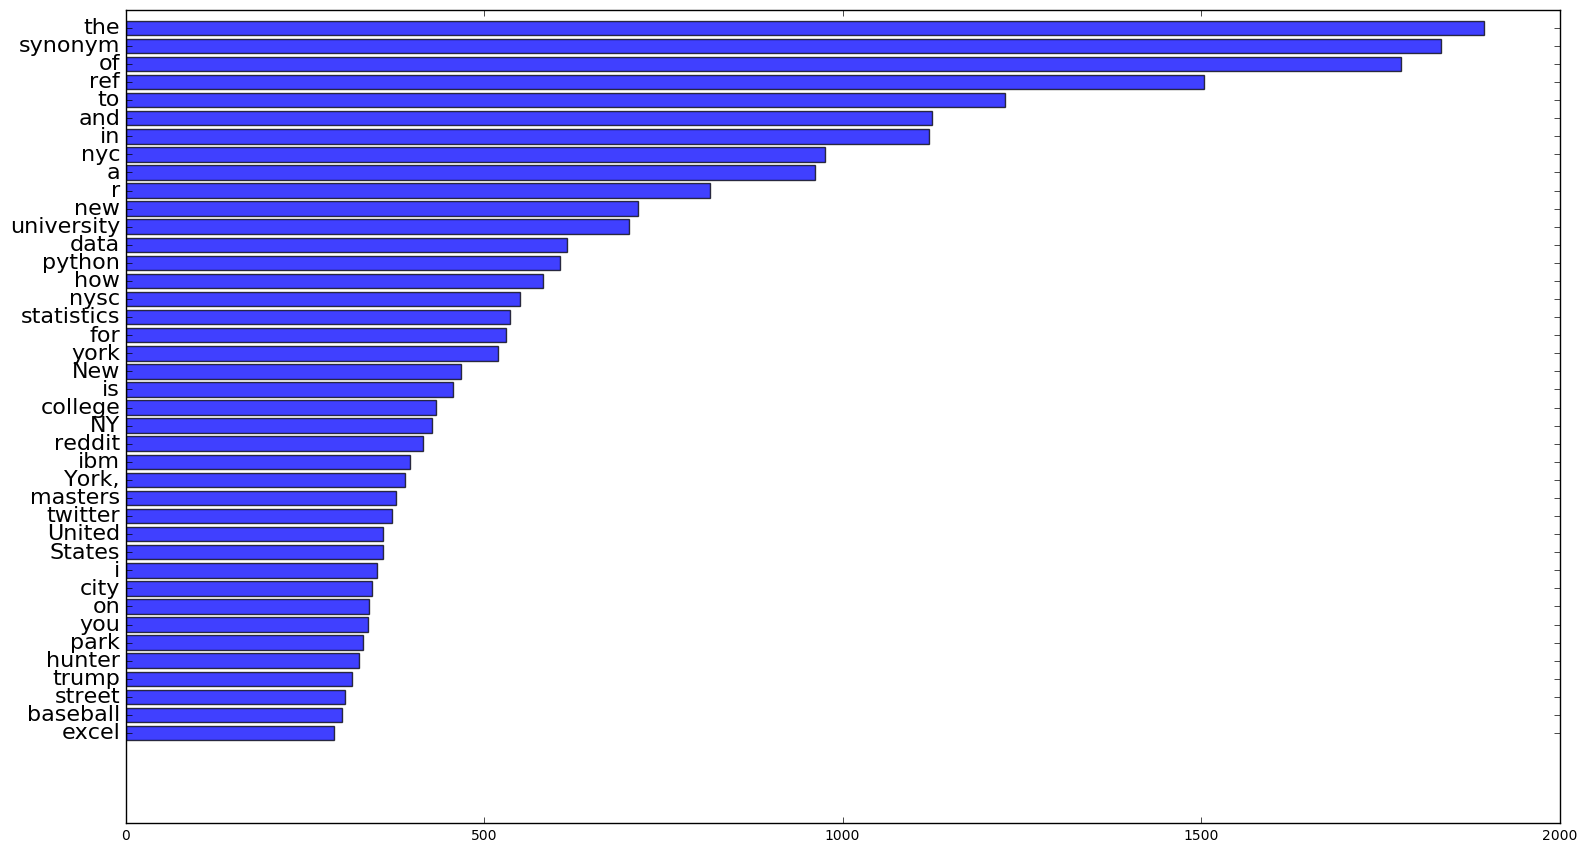

In [3]:
combo = ' '.join(searches)
freqs = Counter(combo.split())
top = freqs.most_common(40)

words = []
counts = []
for i in range(40):
    words.append(top[i][0])
    counts.append(top[i][1])

words.reverse()
counts.reverse()

plt.barh(range(40), counts, align='center', color='b', alpha=0.75)
plt.yticks(range(40), words, fontsize=16)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.show()

In [4]:
def term_by_week(data, start, end, terms, normalized=False):
    start = datetime.datetime.strptime(start, '%Y-%m-%d')
    end = datetime.datetime.strptime(end, '%Y-%m-%d')
    weeks=[]
    while start < end:
        weeks.append(start.strftime('%Y-%m-%d'))
        start += datetime.timedelta(days=7)

    for term in terms:
        term_weeks = []
        for i in range(len(weeks)-1):
            term_weeks.append(sum((data['time'] > weeks[i]) & 
                      (data['time'] < weeks[i+1]) &
                      (data['search'].str.contains(term))))
        termlength = len(term_weeks)
        if normalized == True:
            term_weeks = [i/float(max(term_weeks)) for i in term_weeks]
        plt.plot(range(termlength), term_weeks, label=term, linewidth=5.0)

    ticks = range(1, len(weeks), len(weeks)/4)[0:4] + [len(weeks)-1]
    plt.xticks(ticks, [weeks[i] for i in ticks], fontsize=15)
    plt.xlim((0,len(weeks)))
    plt.xlabel('Week', fontsize=24)
    plt.ylabel('Frequency', fontsize=24)
    plt.legend()
    plt.gcf().set_size_inches(18.5, 10.5, forward=True)
    plt.show()

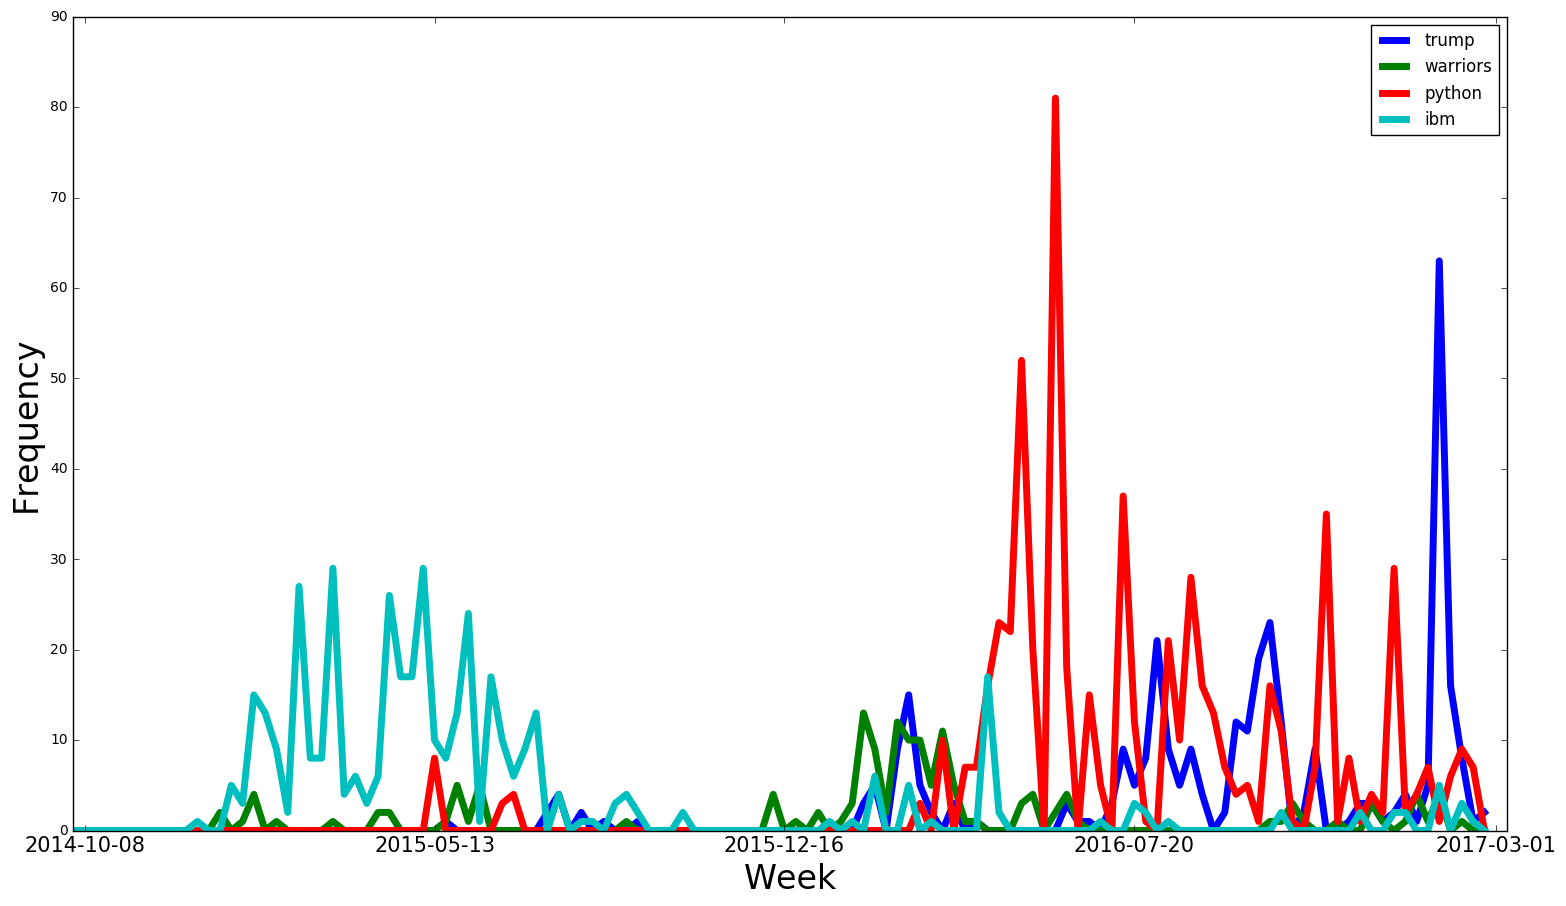

In [5]:
d = {"search": searches, "time": dates}
googled = pd.DataFrame(d)

term_by_week(googled, '2014-10-01', '2017-03-05', 
        ('trump', 'warriors', 'python', 'ibm'))